# Using A/B Testing to determine which combo will have better performance

In [1]:
#Using CR to compare between 2 combos

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_excel(r'C:\Users\LENOVO\Downloads\a_b_testing.xlsx')
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df['visitor'] = pd.to_numeric(df['visitor'])
df.head()

,date,product,platform,visitor,pageview,item_sold,atc_qty,atc_visitor,order,buyer,gmv,net_profit
0,2019-06-01,combo_A,#001,709.0,785,43,156,109,39,29,19494964,9748832
1,2019-06-01,combo_B,#001,695.0,790,48,140,103,34,18,11841020,9074895
2,2019-06-01,combo_A,#002,621.0,743,59,118,96,54,51,26931781,13496977
3,2019-06-01,combo_B,#002,17.0,84,23,5,4,22,28,7641504,5851164
4,2019-06-01,combo_A,#003,181.0,290,15,40,31,13,-2,6487981,3236002


In [32]:
df_A = df[df['product'] == 'combo_A']
CR1_A = round((df_A['visitor'].sum())/(df_A['atc_visitor'].sum()),3)
CR2_A = round((df_A['atc_visitor'].sum())/(df_A['buyer'].sum()),3)

A: CR1 = 6.716 _ CR2 = 2.373


In [33]:
df_B = df[df['product'] == 'combo_B']
CR1_B = round((df_B['visitor'].sum())/(df_B['atc_visitor'].sum()),3)
CR2_B = round((df_B['atc_visitor'].sum())/(df_B['buyer'].sum()),3)
print('A: ' + 'CR1 = ' + str(CR1_A) +' _ ' + 'CR2 = ' + str(CR2_A))
print('B: ' + 'CR1 = ' + str(CR1_B) +' _ ' + 'CR2 = ' + str(CR2_B))

A: CR1 = 6.716 _ CR2 = 2.373
B: CR1 = 6.418 _ CR2 = 2.438


In [35]:
## Dựa trên kết quả ta dễ dàng thấy được: Đối với combo A thì tỉ lệ giữa người xem và người thực sự thêm hàng vào giỏ cao hơn so với combo B chứng tỏ combo B đem lại cảm giác muốn mua hơn so với combo A. Tuy vậy thì tỉ lệ người thực sự xác nhận mua hàng ở combo A lại lớn hơn combo B => combo A có tỉ lệ người mua cao hơn so với combo B

In [36]:
## compare the profit between 2 combos

In [44]:
def get_sum_profit(dataframe):
    june = (dataframe['date'] >= '2019-06-01') & (dataframe['date'] <= '2019-06-30')
    july = (dataframe['date'] >= '2019-07-01') & (dataframe['date'] <= '2019-07-31')
    august = (dataframe['date'] >= '2019-08-01') & (dataframe['date'] <= '2019-08-31')
    
    profit_june = dataframe[june]['net_profit'].sum()
    profit_july = dataframe[july]['net_profit'].sum()
    profit_august = dataframe[august]['net_profit'].sum()
    return [profit_june, profit_july, profit_august]

profit_A = get_sum_profit(df_A)
profit_B = get_sum_profit(df_B)
profit_B

[841294994, 782885882, 851592184]

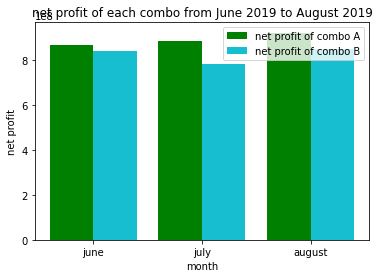

<Figure size 1280x1600 with 0 Axes>

In [52]:
group = ['june', 'july', 'august']
x_axis = np.arange(len(group))

plt.bar(x_axis - 0.2, profit_A, 0.4, label = 'net profit of combo A', color= 'g')
plt.bar(x_axis + 0.2, profit_B, 0.4, label = 'net profit of combo B', color = 'tab:cyan')
plt.xticks(x_axis, group)
plt.xlabel('month')
plt.ylabel('net profit')
plt.title('net profit of each combo from June 2019 to August 2019')
plt.legend()
plt.figure(figsize = (16,20), dpi = 80)
plt.show()

In [ ]:
#Như vậy, ta có thể thấy sự liên hệ so với CR của từng combo: combo A có tỉ lệ chuyển đổi giữa khách mua và người xem cao hơn combo B => combo A đem lại nhiều doanh thu và lợi nhuận hơn combo B => Tập trung triển khai các chiến lược bán hàng liên quan tới combo A